<a href="https://colab.research.google.com/github/jairomartinezgiraldo/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Instalar la api de kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=610ebedf000ad7de61a9759e3ebbec8719799e6d4dd3fcb3e55d8fb13dab24a8
  Stored in directory: /root/.cache/pip/wheels/9f/af/22/bf406f913dc7506a485e60dce8143741abd0a92a19337d83a3
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.17
    Uninstalling kaggle-1.6.17:
      Successfully uninstalled kaggle-1.6.17


In [ ]:
# seleccionar api token
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jairommartinezg","key":"1c02854f93cb8d27ae2b578639336988"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [2]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [2]:
!mkdir my_dataset

Descargamos el dataset "Yoga Posture"

In [3]:
!kaggle datasets download -d tr1gg3rtrash/yoga-posture-dataset

Dataset URL: https://www.kaggle.com/datasets/tr1gg3rtrash/yoga-posture-dataset
License(s): CC0-1.0
100% 447M/447M [00:24<00:00, 22.0MB/s]
100% 447M/447M [00:24<00:00, 19.3MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/yoga-posture-dataset.zip', 'r')
zip_ref.extractall('/content/my_dataset')
zip_ref.close()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
BASE_FOLDER = "/content/drive/MyDrive/07MIAR_Proyecto_Programacion/"

In [7]:
import os
print(os.listdir('/content/my_dataset'))


['Upavistha Konasana', 'Ardha Navasana', 'Parsvottanasana', 'Vrksasana', 'Urdhva Dhanurasana', 'Utkatasana', 'Garudasana', 'Virabhadrasana Three', 'Salamba Sarvangasana', 'Anjaneyasana', 'Setu Bandha Sarvangasana', 'Dhanurasana', 'Balasana', 'Uttanasana', 'Trikonasana', 'Ardha Pincha Mayurasana', 'Ardha Chandrasana', 'Ashta Chandrasana', 'Adho Mukha Svanasana', 'Sivasana', 'Utthita Hasta Padangusthasana', 'Baddha Konasana', 'Urdhva Mukha Svsnssana', 'Marjaryasana', 'Salamba Bhujangasana', 'Bakasana', 'Parsva Virabhadrasana', 'Supta Kapotasana', 'Alanasana', 'Virabhadrasana Two', 'Vasisthasana', 'Utthita Parsvakonasana', 'Halasana', 'Virabhadrasana One', 'Bitilasana', 'Eka Pada Rajakapotasana', 'Hanumanasana', 'Padmasana', 'Ustrasana', 'Navasana', 'Paschimottanasana', 'Poses.json', 'Pincha Mayurasana', 'Adho Mukha Vrksasana', 'Malasana', 'Phalakasana', 'Camatkarasana', 'Ardha Matsyendrasana']


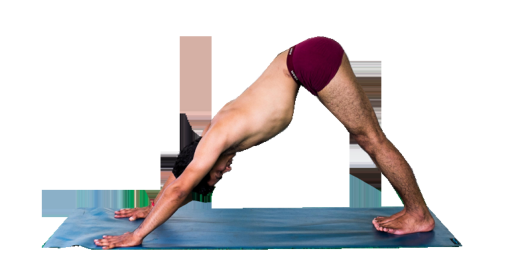

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


# Definir la ruta base del dataset
base_dir = '/content/my_dataset'

# Obtener la lista de subcarpetas
subfolders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]

# Seleccionar una subcarpeta aleatoria
chosen_folder = np.random.choice(subfolders)
test_dir = os.path.join(base_dir, chosen_folder)  # Ruta completa de la subcarpeta seleccionada

# Escoger un índice aleatorio entre las imágenes disponibles
idx = np.random.randint(1, 10)
img_path = os.path.join(test_dir, f"File{idx}.png")  # Crear la ruta de la imagen

# Cargar la imagen y convertirla a RGB
img = cv2.imread(img_path)
if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')  # Ocultar ejes
    plt.show()
else:
    print(f'Error: No se encontró la imagen en {img_path}')

Importamos las librerias

In [10]:
number_label = {}
total_file = 0
for i in os.listdir(base_dir):
  patch = os.path.join(base_dir, i)
  if os.path.isdir(patch):
    number_label[i] = len(os.listdir(patch))
    total_file += len(os.listdir(patch))

print(number_label)
print(f"Total de imagenes: {total_file}")

{'Upavistha Konasana': 17, 'Ardha Navasana': 13, 'Parsvottanasana': 43, 'Vrksasana': 68, 'Urdhva Dhanurasana': 74, 'Utkatasana': 81, 'Garudasana': 85, 'Virabhadrasana Three': 69, 'Salamba Sarvangasana': 73, 'Anjaneyasana': 71, 'Setu Bandha Sarvangasana': 66, 'Dhanurasana': 54, 'Balasana': 79, 'Uttanasana': 71, 'Trikonasana': 23, 'Ardha Pincha Mayurasana': 54, 'Ardha Chandrasana': 59, 'Ashta Chandrasana': 12, 'Adho Mukha Svanasana': 74, 'Sivasana': 20, 'Utthita Hasta Padangusthasana': 64, 'Baddha Konasana': 81, 'Urdhva Mukha Svsnssana': 69, 'Marjaryasana': 56, 'Salamba Bhujangasana': 62, 'Bakasana': 84, 'Parsva Virabhadrasana': 14, 'Supta Kapotasana': 13, 'Alanasana': 18, 'Virabhadrasana Two': 61, 'Vasisthasana': 80, 'Utthita Parsvakonasana': 69, 'Halasana': 71, 'Virabhadrasana One': 64, 'Bitilasana': 94, 'Eka Pada Rajakapotasana': 53, 'Hanumanasana': 41, 'Padmasana': 77, 'Ustrasana': 96, 'Navasana': 18, 'Paschimottanasana': 62, 'Pincha Mayurasana': 43, 'Adho Mukha Vrksasana': 65, 'Mala

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, ResNet50, VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import imagenet_utils
from sklearn.model_selection import train_test_split

Preparamos los datos

In [12]:
def cargar_dataset(img_size=(224, 224)):
    class_names = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]
    X, y = [], []

    # Iterar sobre cada clase para cargar las imágenes
    for class_idx, class_name in enumerate(class_names):
        class_path = os.path.join(base_dir, class_name)
        images = [img for img in os.listdir(class_path) if img.endswith(('.png', '.jpeg', '.jpg', '.gif'))]
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size=img_size)  # Redimensionar la imagen
            img_array = img_to_array(img)  # Convertir la imagen a un array de NumPy
            X.append(img_array)
            y.append(class_idx)

    # Convertir listas a arrays de NumPy
    X = np.array(X)
    y = np.array(y)

    # Normalizar las imágenes usando imagenet_utils
    X = imagenet_utils.preprocess_input(X)

    # Aplicar One-Hot Encoding a las etiquetas para usar en la clasificación
    y = to_categorical(y, num_classes=len(class_names))

    print(f'Tamaño del conjunto de datos: {X.shape}, {y.shape}')
    return X, y, class_names

# Ejecutar la función para cargar y procesar el dataset
X, y, class_names = cargar_dataset()

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Tamaño del conjunto de datos: (2758, 224, 224, 3), (2758, 47)


In [ ]:
# Este codigo es solo informativo, para validar los formatos de imagenes y saber cuales son.
# Crear una lista para almacenar las extensiones de archivos de imagen
from collections import Counter
image_extensions = []

# Recorrer todas las subcarpetas y archivos en el directorio base
for root, _, files in os.walk(base_dir):
    for file in files:
        # Obtener la extensión del archivo
        ext = os.path.splitext(file)[1].lower()  # Convertir a minúsculas para evitar duplicados
        # Agregar la extensión si es un archivo de imagen
        if ext in ['.png', '.jpeg', '.jpg', '.bmp', '.gif', '.tiff', '.webp']:
            image_extensions.append(ext)

# Contar la cantidad de cada formato de imagen
extension_count = Counter(image_extensions)

print("Cantidad de formatos de imagen encontrados:")
for ext, count in extension_count.items():
    print(f"{ext}: {count}")

Cantidad de formatos de imagen encontrados:
.png: 2314
.jpeg: 401
.jpg: 41
.gif: 2


**Dividimos el Dataset en Entrenamiento y Validación**

In [13]:
# Dividimos los datos en 80% entrenamiento y 20% validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Conjunto de validación: {X_val.shape}, {y_val.shape}")

Conjunto de entrenamiento: (2206, 224, 224, 3), (2206, 47)
Conjunto de validación: (552, 224, 224, 3), (552, 47)


**Modelos Preentrenados**

In [14]:
def crear_modelo_preentrenado(nombre_modelo, num_clases, input_shape=(224, 224, 3)):
    """
    Crea un modelo con la arquitectura especificada y técnicas de regularización.

    Parámetros:
    - nombre_modelo: El nombre del modelo preentrenado a utilizar (ej. 'MobileNetV2').
    - num_clases: Número de clases en el dataset.
    - input_shape: Tamaño de las imágenes de entrada.

    Técnicas aplicadas:
    - GlobalAveragePooling2D: Reduce la dimensionalidad de las características al promediar, ayuda a evitar sobreajuste.
    - Dense con kernel_regularizer=l2(0.01): Añade penalización sobre los pesos para reducir la complejidad del modelo.
    - Batch Normalization: Normaliza activaciones para hacer el entrenamiento más estable y rápido.
    - Dropout: Apaga aleatoriamente neuronas durante el entrenamiento para evitar sobreajuste.
    """
    modelos_base = {
        'MobileNetV2': MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape),
        'ResNet50': ResNet50(weights='imagenet', include_top=False, input_shape=input_shape),
        'VGG16': VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    }

    # Obtener el modelo base solicitado
    base_model = modelos_base[nombre_modelo]
    base_model.trainable = False  # Congelar las capas del modelo base para mantener el conocimiento preentrenado

    # Construir el modelo usando Sequential
    modelo = Sequential([
        base_model,
        GlobalAveragePooling2D(),  # Reduce la dimensionalidad al promedio de cada canal
        Dense(512, kernel_regularizer=l2(0.01)),  # Añadir regularización para reducir el sobreajuste
        BatchNormalization(),  # Normalizar activaciones para estabilizar el entrenamiento
        tf.keras.layers.Activation('relu'),  # Activación no lineal para aprender patrones complejos
        Dropout(0.5),  # Apagar aleatoriamente el 50% de las neuronas durante el entrenamiento para evitar sobreajuste
        Dense(256, kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        Dropout(0.3),  # Apagar el 30% de las neuronas
        Dense(num_clases, activation='softmax')  # Capa de salida con activación softmax para clasificación multiclase
    ])

    return modelo

# Crear y probar MobileNetV2
print("\nProbando modelo: MobileNetV2")
modelo_mobilenet = crear_modelo_preentrenado('MobileNetV2', len(class_names))

# Compilar el modelo
modelo_mobilenet.compile(optimizer=Adam(learning_rate=0.001),
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

# Entrenar el modelo (entrenamiento rápido para prueba inicial, 5 épocas)
history_mobilenet = modelo_mobilenet.fit(X_train, y_train,
                                         validation_data=(X_val, y_val),
                                         epochs=5, batch_size=32)

# Evaluar el modelo
val_loss, val_acc = modelo_mobilenet.evaluate(X_val, y_val)
print(f"Resultados para MobileNetV2: Accuracy: {val_acc:.4f}, Loss: {val_loss:.4f}")

# Crear y probar VGG16
print("\nProbando modelo: VGG16")
modelo_vgg16 = crear_modelo_preentrenado('VGG16', len(class_names))

# Compilar el modelo
modelo_vgg16.compile(optimizer=Adam(learning_rate=0.001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Entrenar el modelo (entrenamiento rápido para prueba inicial, 5 épocas)
history_vgg16 = modelo_vgg16.fit(X_train, y_train,
                                 validation_data=(X_val, y_val),
                                 epochs=5, batch_size=32)

# Evaluar el modelo
val_loss, val_acc = modelo_vgg16.evaluate(X_val, y_val)
print(f"Resultados para VGG16: Accuracy: {val_acc:.4f}, Loss: {val_loss:.4f}")



Probando modelo: MobileNetV2
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 33s 261ms/step - accuracy: 0.0971 - loss: 13.5045 - val_accuracy: 0.3170 - val_loss: 9.8184
Epoch 2/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.3913 - loss: 8.8118 - val_accuracy: 0.4565 - val_loss: 7.2000
Epoch 3/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5589 - loss: 6.2831 - val_accuracy: 0.5000 - val_loss: 5.6729
Epoch 4/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.6226 - loss: 4.8840 - val_accuracy: 0.5127 - val_loss: 4.8373
Epoch 5/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.6919 - loss: 3.8871 - val_accuracy: 0.5254 - val_loss: 4.2343
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5210 - loss: 4.2406
Resultados para MobileNetV2: Accuracy: 0.5254, Loss: 4.2343

Probando modelo: VGG16
Epoch 1/5
69/69 ━━━━━━━━━━━━

Creamos generadores de Datos con Data Augmentation

In [24]:
def crear_generadores():
    """
    Crea generadores de datos con data augmentation para mejorar la capacidad de generalización del modelo.
    """
    # Generador para el conjunto de entrenamiento con data augmentation
    train_datagen = ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        rotation_range=20,  # Rotación aleatoria entre -20 y 20 grados
        width_shift_range=0.2,  # Desplazamiento horizontal del 20%
        height_shift_range=0.2,  # Desplazamiento vertical del 20%
        horizontal_flip=True,  # Volteo horizontal aleatorio
        validation_split=0.2  # División entre entrenamiento y validación
    )

    # Generador para el conjunto de validación (sin data augmentation, solo normalización)
    val_datagen = ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.2
    )

    return train_datagen, val_datagen

# Crear generadores de datos
train_datagen, val_datagen = crear_generadores()

# Ajustar generadores a los datos
train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size=32,
    subset='training'
)

val_generator = val_datagen.flow(
    X_val, y_val,
    batch_size=32,
    subset='validation'
)

In [25]:
from sklearn.metrics import classification_report
import numpy as np

def evaluar_modelo(modelo, X_val, y_val, history, label_names):
    """
    Evalúa el modelo, genera un reporte de clasificación y muestra gráficos de rendimiento.

    Parámetros:
    - modelo: El modelo a evaluar.
    - X_val: Conjunto de datos de validación (imágenes).
    - y_val: Etiquetas de validación (one-hot encoded).
    - history: Historial del entrenamiento.
    - label_names: Lista con los nombres de las clases.
    """
    print("[INFO]: Evaluando el modelo...")

    # Realizar predicciones en el conjunto de validación
    predictions = modelo.predict(X_val)

    # Convertir y_val de one-hot encoding a clases enteras
    y_true = y_val.argmax(axis=1)
    y_pred = predictions.argmax(axis=1)

    # Obtener las clases presentes en el conjunto de validación
    unique_classes = np.unique(y_true)

    # Filtrar los nombres de las clases que están presentes en el conjunto de validación
    filtered_label_names = [label_names[i] for i in unique_classes]

    # Obtener el reporte de clasificación
    print("[INFO]: Generando reporte de clasificación...")
    print(classification_report(y_true, y_pred, labels=unique_classes, target_names=filtered_label_names))

    # Graficar la pérdida y la precisión del entrenamiento
    plt.style.use("ggplot")
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(0, len(history['loss'])), history["loss"], label="train_loss")
    plt.plot(np.arange(0, len(history['val_loss'])), history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, len(history['accuracy'])), history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, len(history['val_accuracy'])), history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.show()


Entrenar MobileNetV2 con Data Augmentation


Entrenando modelo: MobileNetV2 con Data Augmentation
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 372ms/step - accuracy: 0.7739 - loss: 2.2832 - val_accuracy: 0.7364 - val_loss: 2.3659 - learning_rate: 2.0000e-04
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 361ms/step - accuracy: 0.7958 - loss: 2.1822 - val_accuracy: 0.7364 - val_loss: 2.3434 - learning_rate: 2.0000e-04
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 378ms/step - accuracy: 0.8000 - loss: 2.0873 - val_accuracy: 0.7364 - val_loss: 2.2734 - learning_rate: 2.0000e-04
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 403ms/step - accuracy: 0.7951 - loss: 2.0426 - val_accuracy: 0.7545 - val_loss: 2.2315 - learning_rate: 2.0000e-04
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 406ms/step - accuracy: 0.8162 - loss: 1.9228 - val_accuracy: 0.7364 - val_loss: 2.1545 - learning_rate: 2.0000e-04
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 369ms/step - accuracy: 0.8326 - loss: 1.8637 - val_accuracy: 0.7273 - val_loss: 2.1086 - learning_rate: 2.0000e-04
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 363ms/step - accuracy: 0.83

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


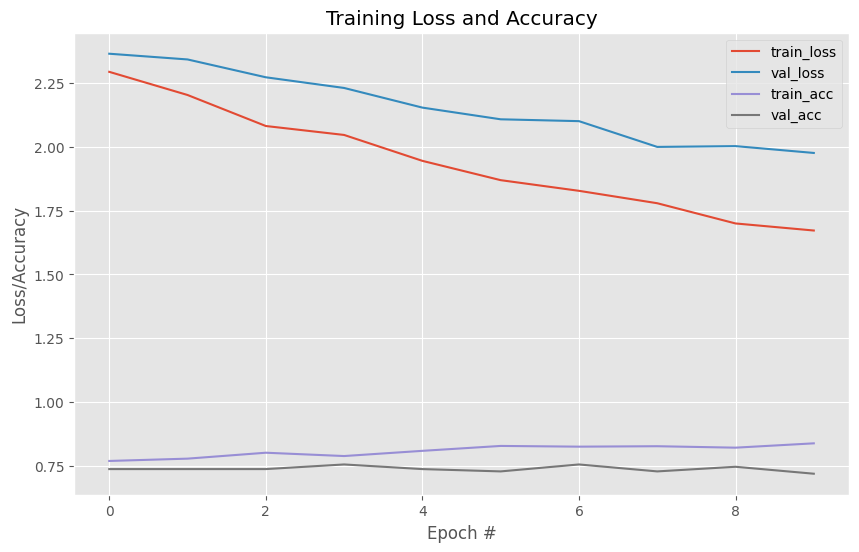

In [26]:
# Entrenar MobileNetV2 con Data Augmentation
print("\nEntrenando modelo: MobileNetV2 con Data Augmentation")
history_mobilenet_aug = modelo_mobilenet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
    ]
)

# Evaluar MobileNetV2 inmediatamente después de entrenar (con Data Augmentation)
print("\nEvaluación de MobileNetV2 con Data Augmentation")
evaluar_modelo(modelo_mobilenet, X_val, y_val, history_mobilenet_aug.history, class_names)



Entrenar VGG16 con Data Augmentation


Entrenando modelo: VGG16 con Data Augmentation
Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 46s 685ms/step - accuracy: 0.4465 - loss: 4.0961 - val_accuracy: 0.0818 - val_loss: 6.1320 - learning_rate: 0.0010
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 64s 439ms/step - accuracy: 0.5080 - loss: 3.7447 - val_accuracy: 0.1545 - val_loss: 5.6814 - learning_rate: 0.0010
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 25s 405ms/step - accuracy: 0.5707 - loss: 3.3175 - val_accuracy: 0.1273 - val_loss: 5.2662 - learning_rate: 0.0010
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 400ms/step - accuracy: 0.6124 - loss: 3.0622 - val_accuracy: 0.1545 - val_loss: 4.8704 - learning_rate: 0.0010
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 386ms/step - accuracy: 0.6415 - loss: 2.8829 - val_accuracy: 0.1182 - val_loss: 4.5298 - learning_rate: 0.0010
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 402ms/step - accuracy: 0.6143 - loss: 2.7388 - val_accuracy: 0.2727 - val_loss: 4.2050 - learning_rate: 0.0010
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


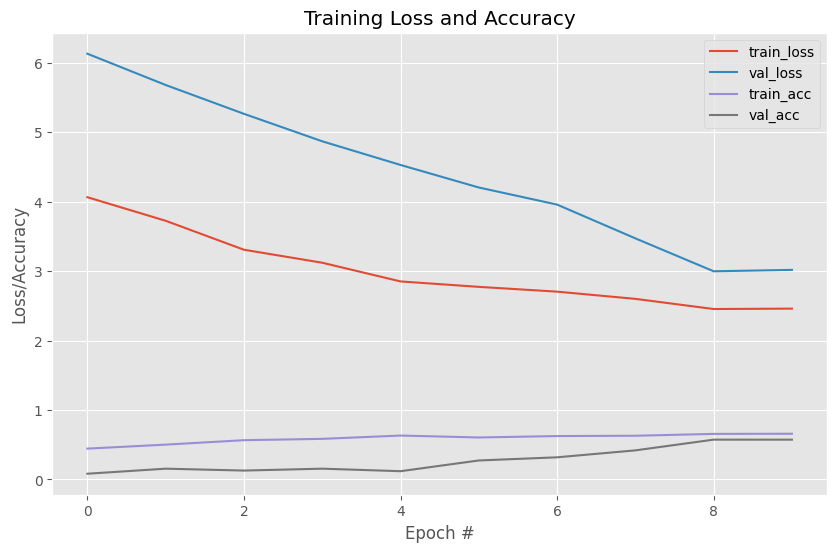

In [27]:
print("\nEntrenando modelo: VGG16 con Data Augmentation")
history_vgg16_aug = modelo_vgg16.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
    ]
)

# Evaluar VGG16 inmediatamente después de entrenar (con Data Augmentation)
print("\nEvaluación de VGG16 con Data Augmentation")
evaluar_modelo(modelo_vgg16, X_val, y_val, history_vgg16_aug.history, class_names)